In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.8.6


In [3]:
import numpy
numpy.version.version

'1.23.5'

In [4]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2020-04-30 19:00:00,242.060716,18.870796,71.072939,188.915151,91.471325,4.0,3.0,30.0,19.0
2020-04-30 20:00:00,218.655079,18.056864,75.132153,178.704750,84.176485,4.0,3.0,30.0,20.0
2020-04-30 21:00:00,194.147868,17.090891,81.315038,161.421792,73.858294,4.0,3.0,30.0,21.0
2020-04-30 22:00:00,206.432889,16.714085,82.568155,197.744043,83.279611,4.0,3.0,30.0,22.0
2020-04-30 23:00:00,173.577429,16.365121,83.662401,162.157636,68.669099,4.0,3.0,30.0,23.0


In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [6]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [7]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:00:00,621.625704,26.378438,58.063437,46.094860,3.605625,10.0,2.0,2.0,11.0,15.230400
2019-10-02 12:00:00,725.154408,25.795055,48.256857,57.532808,13.865109,10.0,2.0,2.0,12.0,5.384051
2019-10-07 10:00:00,108.196313,32.344264,37.260757,47.259008,11.447809,10.0,0.0,7.0,10.0,4.255772
2019-10-07 11:00:00,135.822676,34.926112,35.013036,42.114260,10.075221,10.0,0.0,7.0,11.0,16.268034
2019-10-07 12:00:00,203.757758,36.201221,31.829282,45.701366,7.624153,10.0,0.0,7.0,12.0,12.770444


# CO DATA

In [8]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'

#train_test_split(X, y, test_size = 0.2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

In [10]:
df1=[x for _, x in CO_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
#data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
#data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]

In [11]:
data_Oct=data_oct.resample('60min').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('60min').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('60min').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('60min').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('60min').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('60min').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('60min').mean()
data_Apr=data_Apr.dropna()

In [12]:
co_data=CO_Data
co_data=co_data.resample('60min').mean()
co_data=co_data.dropna()
X=co_data[['Net Signal','Temp','RH','Month','Day_of_week','Hour']]
y=co_data['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings,estimator_list=["xgboost"])#,estimator_list=["xgboost"]
pred=automl.predict(X_test)
rmse_r=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)

[flaml.automl: 12-19 16:07:23] {2599} INFO - task = regression
[flaml.automl: 12-19 16:07:23] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:07:23] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:07:23] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:07:23] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:07:23] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:23] {3296} INFO - Estimated sufficient time budget=1148s. Estimated n

[flaml.automl: 12-19 16:07:24] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:24] {3343} INFO -  at 1.1s,	estimator xgboost's best error=130.4509,	best estimator xgboost's best error=130.4509
[flaml.automl: 12-19 16:07:24] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 16:07:25] {3343} INFO -  at 2.4s,	estimator xgboost's best error=124.3752,	best estimator xgboost's best error=124.3752
[flaml.automl: 12-19 16:07:25] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:25] {3343} INFO -  at 2.5s,	estimator xgboost's best error=124.3752,	best estimator xgboost's best error=124.3752
[flaml.automl: 12-19 16:07:25] {3166} INFO - iteration 26, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 16:07:28] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:28] {3343} INFO -  at 5.2s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:07:28] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 16:07:31] {3343} INFO -  at 8.2s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:07:31] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:31] {3343} INFO -  at 8.3s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:07:31] {3166} INFO - iteration 51, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 16:07:36] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:36] {3343} INFO -  at 13.7s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:07:36] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based

[flaml.automl: 12-19 16:07:42] {3343} INFO -  at 19.3s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:07:42] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:42] {3343} INFO -  at 19.8s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:07:42] {3166} INFO - iteration 76, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:07:49] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:50] {3343} INFO -  at 27.3s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:07:50] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based

[flaml.automl: 12-19 16:07:58] {3343} INFO -  at 35.6s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:07:58] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:58] {3343} INFO -  at 35.7s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:07:58] {3166} INFO - iteration 101, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: F

[flaml.automl: 12-19 16:08:04] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:05] {3343} INFO -  at 42.5s,	estimator xgboost's best error=110.1955,	best estimator xgboost's best error=110.1955
[flaml.automl: 12-19 16:08:05] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-bas

[flaml.automl: 12-19 16:08:36] {3343} INFO -  at 73.4s,	estimator xgboost's best error=109.5516,	best estimator xgboost's best error=109.5516
[flaml.automl: 12-19 16:08:36] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:37] {3343} INFO -  at 74.3s,	estimator xgboost's best error=109.5516,	best estimator xgboost's best error=109.5516
[flaml.automl: 12-19 16:08:37] {3166} INFO - iteration 126, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: F

[flaml.automl: 12-19 16:09:30] {3166} INFO - iteration 137, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:34] {3343} INFO -  at 131.2s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:09:34] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-ba

[flaml.automl: 12-19 16:10:36] {3343} INFO -  at 193.2s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:10:36] {3166} INFO - iteration 150, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:37] {3343} INFO -  at 194.9s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:10:37] {3166} INFO - iteration 151, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294:

[flaml.automl: 12-19 16:11:50] {3166} INFO - iteration 162, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:54] {3343} INFO -  at 271.8s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:11:54] {3166} INFO - iteration 163, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-ba

[flaml.automl: 12-19 16:12:51] {3343} INFO -  at 327.9s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:12:51] {3166} INFO - iteration 175, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:55] {3343} INFO -  at 332.6s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:12:55] {3166} INFO - iteration 176, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294:

[flaml.automl: 12-19 16:13:49] {3166} INFO - iteration 187, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:56] {3343} INFO -  at 393.2s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:13:56] {3166} INFO - iteration 188, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-ba

[flaml.automl: 12-19 16:14:47] {3343} INFO -  at 444.6s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:14:47] {3166} INFO - iteration 200, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:49] {3343} INFO -  at 446.9s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:14:49] {3166} INFO - iteration 201, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294:

[flaml.automl: 12-19 16:15:36] {3166} INFO - iteration 212, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:37] {3343} INFO -  at 494.1s,	estimator xgboost's best error=108.3730,	best estimator xgboost's best error=108.3730
[flaml.automl: 12-19 16:15:37] {3166} INFO - iteration 213, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-ba

In [13]:
from sklearn.neighbors import LocalOutlierFactor
A=['Net Signal','Temp','RH','Month','Day_of_week','Hour']
B='Ref'
frame1=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Mar]#,data_feb
Train1=pd.concat(frame1)
train1=Train1.sample(frac=1)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train1)
mask = yhat != -1
train1= train1[mask]
test1=data_Apr
yhat = lof.fit_predict(test1)
mask = yhat != -1
test1= test1[mask]

frame2=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Apr]#,data_feb
Train2=pd.concat(frame2)
train2=Train2.sample(frac=1)
yhat = lof.fit_predict(train2)
mask = yhat != -1
train2= train2[mask]
test2=data_Mar
yhat = lof.fit_predict(test2)
mask = yhat != -1
test2= test2[mask]

frame3=[data_Oct,data_Nov,data_Dec,data_Jan,data_Mar,data_Apr]#,data_feb
Train3=pd.concat(frame3)
train3=Train3.sample(frac=1)
yhat = lof.fit_predict(train3)
mask = yhat != -1
train3= train3[mask]
test3=data_Feb
yhat = lof.fit_predict(test3)
mask = yhat != -1
test3= test3[mask]

frame4=[data_Oct,data_Nov,data_Dec,data_Feb,data_Mar,data_Apr]#,data_feb
Train4=pd.concat(frame4)
train4=Train4.sample(frac=1)
yhat = lof.fit_predict(train4)
mask = yhat != -1
train4= train4[mask]
test4=data_Jan
yhat = lof.fit_predict(test4)
mask = yhat != -1
test4= test4[mask]

frame5=[data_Oct,data_Nov,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train5=pd.concat(frame5)
train5=Train5.sample(frac=1)
yhat = lof.fit_predict(train5)
mask = yhat != -1
train5= train5[mask]
test5=data_Dec
yhat = lof.fit_predict(test5)
mask = yhat != -1
test5= test5[mask]

frame6=[data_Oct,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train6=pd.concat(frame6)
train6=Train6.sample(frac=1)
yhat = lof.fit_predict(train6)
mask = yhat != -1
train6= train6[mask]
test6=data_Nov
yhat = lof.fit_predict(test6)
mask = yhat != -1
test6= test6[mask]

frame7=[data_Nov,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train7=pd.concat(frame7)
train7=Train7.sample(frac=1)
yhat = lof.fit_predict(train7)
mask = yhat != -1
train7= train7[mask]
test7=data_Oct
yhat = lof.fit_predict(test7)
mask = yhat != -1
test7= test7[mask]


Train=[train1,train2,train3,train4,train5,train6,train7]
Test=[test1,test2,test3,test4,test5,test6,test7]

In [14]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

rmse=[]

# Train with labeled input data
for i in range(7):
    automl.fit(X_train=Train[i][A], y_train=Train[i][B],
           **automl_settings,estimator_list=["xgboost"])#,estimator_list=["xgboost"]
    pred=automl.predict(Test[i][A])
    R2=round(sm.r2_score(Test[i][B], pred), 2)
    r=round(np.corrcoef(Test[i][B], pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(Test[i][B], pred))/np.mean(Test[i][B]),2)
    rmse.append(RMSE)
    print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
#print(automl.model.estimator)

[flaml.automl: 12-19 16:15:47] {2599} INFO - task = regression
[flaml.automl: 12-19 16:15:47] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:15:47] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:15:47] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:15:47] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:15:48] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:48] {3296} INFO - Estimated sufficient time budget=1397s. Estimated n

[flaml.automl: 12-19 16:15:50] {3343} INFO -  at 2.3s,	estimator xgboost's best error=98.5952,	best estimator xgboost's best error=98.5952
[flaml.automl: 12-19 16:15:50] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:50] {3343} INFO -  at 2.5s,	estimator xgboost's best error=93.7824,	best estimator xgboost's best error=93.7824
[flaml.automl: 12-19 16:15:50] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:54] {3343} INFO -  at 7.3s,	estimator xgboost's best error=82.4153,	best estimator xgboost's best error=82.4153
[flaml.automl: 12-19 16:15:54] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:16:02] {3343} INFO -  at 14.4s,	estimator xgboost's best error=78.8573,	best estimator xgboost's best error=78.8573
[flaml.automl: 12-19 16:16:02] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:02] {3343} INFO -  at 14.8s,	estimator xgboost's best error=78.8573,	best estimator xgboost's best error=78.8573
[flaml.automl: 12-19 16:16:02] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:08] {3343} INFO -  at 20.8s,	estimator xgboost's best error=78.8573,	best estimator xgboost's best error=78.8573
[flaml.automl: 12-19 16:16:08] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:16:14] {3343} INFO -  at 26.7s,	estimator xgboost's best error=78.8573,	best estimator xgboost's best error=78.8573
[flaml.automl: 12-19 16:16:14] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:14] {3343} INFO -  at 27.1s,	estimator xgboost's best error=78.8573,	best estimator xgboost's best error=78.8573
[flaml.automl: 12-19 16:16:14] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:20] {3343} INFO -  at 33.1s,	estimator xgboost's best error=78.8573,	best estimator xgboost's best error=78.8573
[flaml.automl: 12-19 16:16:20] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:16:27] {3343} INFO -  at 39.3s,	estimator xgboost's best error=78.8573,	best estimator xgboost's best error=78.8573
[flaml.automl: 12-19 16:16:27] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:27] {3343} INFO -  at 40.2s,	estimator xgboost's best error=78.8573,	best estimator xgboost's best error=78.8573
[flaml.automl: 12-19 16:16:27] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:34] {3343} INFO -  at 46.5s,	estimator xgboost's best error=78.8573,	best estimator xgboost's best error=78.8573
[flaml.automl: 12-19 16:16:34] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, us

[flaml.automl: 12-19 16:16:44] {3343} INFO -  at 57.0s,	estimator xgboost's best error=78.5028,	best estimator xgboost's best error=78.5028
[flaml.automl: 12-19 16:16:44] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:47] {3343} INFO -  at 60.0s,	estimator xgboost's best error=78.5028,	best estimator xgboost's best error=78.5028
[flaml.automl: 12-19 16:16:47] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 16:17:02] {3166} INFO - iteration 124, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:17:03] {3343} INFO -  at 75.5s,	estimator xgboost's best error=78.3358,	best estimator xgboost's best error=78.3358
[flaml.automl: 12-19 16:17:03] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based

[flaml.automl: 12-19 16:17:29] {3343} INFO -  at 101.6s,	estimator xgboost's best error=78.3358,	best estimator xgboost's best error=78.3358
[flaml.automl: 12-19 16:17:29] {3166} INFO - iteration 137, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:17:30] {3343} INFO -  at 102.5s,	estimator xgboost's best error=78.3358,	best estimator xgboost's best error=78.3358
[flaml.automl: 12-19 16:17:30] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:18:07] {3166} INFO - iteration 149, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:13] {3343} INFO -  at 145.8s,	estimator xgboost's best error=76.4418,	best estimator xgboost's best error=76.4418
[flaml.automl: 12-19 16:18:13] {3166} INFO - iteration 150, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:18:59] {3343} INFO -  at 192.1s,	estimator xgboost's best error=75.9271,	best estimator xgboost's best error=75.9271
[flaml.automl: 12-19 16:18:59] {3166} INFO - iteration 162, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:01] {3343} INFO -  at 194.1s,	estimator xgboost's best error=75.9271,	best estimator xgboost's best error=75.9271
[flaml.automl: 12-19 16:19:01] {3166} INFO - iteration 163, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:19:42] {3166} INFO - iteration 174, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:44] {3343} INFO -  at 236.8s,	estimator xgboost's best error=75.9271,	best estimator xgboost's best error=75.9271
[flaml.automl: 12-19 16:19:44] {3166} INFO - iteration 175, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:20:32] {3343} INFO -  at 284.8s,	estimator xgboost's best error=75.9271,	best estimator xgboost's best error=75.9271
[flaml.automl: 12-19 16:20:32] {3166} INFO - iteration 187, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:20:36] {3343} INFO -  at 288.3s,	estimator xgboost's best error=75.9271,	best estimator xgboost's best error=75.9271
[flaml.automl: 12-19 16:20:36] {3166} INFO - iteration 188, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:21:11] {3166} INFO - iteration 199, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:14] {3343} INFO -  at 326.8s,	estimator xgboost's best error=75.9271,	best estimator xgboost's best error=75.9271
[flaml.automl: 12-19 16:21:14] {3166} INFO - iteration 200, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:22:00] {3343} INFO -  at 373.1s,	estimator xgboost's best error=75.9271,	best estimator xgboost's best error=75.9271
[flaml.automl: 12-19 16:22:00] {3166} INFO - iteration 212, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:03] {3343} INFO -  at 376.2s,	estimator xgboost's best error=75.1487,	best estimator xgboost's best error=75.1487
[flaml.automl: 12-19 16:22:03] {3166} INFO - iteration 213, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:22:52] {3166} INFO - iteration 224, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:53] {3343} INFO -  at 426.1s,	estimator xgboost's best error=75.1487,	best estimator xgboost's best error=75.1487
[flaml.automl: 12-19 16:22:53] {3166} INFO - iteration 225, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:23:39] {3343} INFO -  at 472.1s,	estimator xgboost's best error=75.1487,	best estimator xgboost's best error=75.1487
[flaml.automl: 12-19 16:23:39] {3166} INFO - iteration 237, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:23:41] {3343} INFO -  at 473.9s,	estimator xgboost's best error=75.1487,	best estimator xgboost's best error=75.1487
[flaml.automl: 12-19 16:23:41] {3166} INFO - iteration 238, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

0.62 -2.74 0.43


[flaml.automl: 12-19 16:24:18] {2599} INFO - task = regression
[flaml.automl: 12-19 16:24:18] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:24:18] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:24:18] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:24:18] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:24:18] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:18] {3296} INFO - Estimated sufficient time budget=1686s. Estimated n

[flaml.automl: 12-19 16:24:22] {3343} INFO -  at 4.0s,	estimator xgboost's best error=86.4819,	best estimator xgboost's best error=86.4819
[flaml.automl: 12-19 16:24:22] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:22] {3343} INFO -  at 4.3s,	estimator xgboost's best error=82.8055,	best estimator xgboost's best error=82.8055
[flaml.automl: 12-19 16:24:22] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:27] {3343} INFO -  at 9.6s,	estimator xgboost's best error=82.8055,	best estimator xgboost's best error=82.8055
[flaml.automl: 12-19 16:24:27] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:24:36] {3343} INFO -  at 18.1s,	estimator xgboost's best error=80.5481,	best estimator xgboost's best error=80.5481
[flaml.automl: 12-19 16:24:36] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:37] {3343} INFO -  at 19.0s,	estimator xgboost's best error=80.5481,	best estimator xgboost's best error=80.5481
[flaml.automl: 12-19 16:24:37] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:45] {3343} INFO -  at 27.2s,	estimator xgboost's best error=80.5481,	best estimator xgboost's best error=80.5481
[flaml.automl: 12-19 16:24:45] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:24:53] {3343} INFO -  at 34.9s,	estimator xgboost's best error=79.9626,	best estimator xgboost's best error=79.9626
[flaml.automl: 12-19 16:24:53] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:53] {3343} INFO -  at 35.2s,	estimator xgboost's best error=79.9626,	best estimator xgboost's best error=79.9626
[flaml.automl: 12-19 16:24:53] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:03] {3343} INFO -  at 45.4s,	estimator xgboost's best error=78.7348,	best estimator xgboost's best error=78.7348
[flaml.automl: 12-19 16:25:03] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:25:18] {3343} INFO -  at 60.6s,	estimator xgboost's best error=78.3951,	best estimator xgboost's best error=78.3951
[flaml.automl: 12-19 16:25:18] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:21] {3343} INFO -  at 63.0s,	estimator xgboost's best error=78.3951,	best estimator xgboost's best error=78.3951
[flaml.automl: 12-19 16:25:21] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:39] {3343} INFO -  at 80.8s,	estimator xgboost's best error=78.3951,	best estimator xgboost's best error=78.3951
[flaml.automl: 12-19 16:25:39] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, us

[flaml.automl: 12-19 16:25:57] {3343} INFO -  at 98.8s,	estimator xgboost's best error=78.3951,	best estimator xgboost's best error=78.3951
[flaml.automl: 12-19 16:25:57] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:26:02] {3343} INFO -  at 104.1s,	estimator xgboost's best error=78.3951,	best estimator xgboost's best error=78.3951
[flaml.automl: 12-19 16:26:02] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futu

[flaml.automl: 12-19 16:26:41] {3166} INFO - iteration 124, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:26:43] {3343} INFO -  at 145.6s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:26:43] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:27:30] {3343} INFO -  at 192.2s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:27:30] {3166} INFO - iteration 137, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:32] {3343} INFO -  at 193.8s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:27:32] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:28:08] {3166} INFO - iteration 149, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:28:14] {3343} INFO -  at 235.8s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:28:14] {3166} INFO - iteration 150, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:29:01] {3343} INFO -  at 283.5s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:29:01] {3166} INFO - iteration 162, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:29:04] {3343} INFO -  at 286.7s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:29:04] {3166} INFO - iteration 163, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:29:52] {3166} INFO - iteration 174, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:29:54] {3343} INFO -  at 336.1s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:29:54] {3166} INFO - iteration 175, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:30:50] {3343} INFO -  at 392.2s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:30:50] {3166} INFO - iteration 187, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:30:53] {3343} INFO -  at 395.5s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:30:53] {3166} INFO - iteration 188, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:31:37] {3166} INFO - iteration 199, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:31:40] {3343} INFO -  at 442.2s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:31:40] {3166} INFO - iteration 200, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:32:19] {3343} INFO -  at 481.3s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:32:19] {3166} INFO - iteration 212, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:21] {3343} INFO -  at 483.2s,	estimator xgboost's best error=75.9801,	best estimator xgboost's best error=75.9801
[flaml.automl: 12-19 16:32:21] {3166} INFO - iteration 213, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

0.71 0.48 0.44


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:39] {3296} INFO - Estimated sufficient time budget=1833s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:32:39] {3343} INFO -  at 0.3s,	estimator xgboost's best error=390.7380,	best estimator xgboost's best error=390.7380
[flaml.automl: 12-19 16:32:39] {3166} INFO - iteration 1, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, 

[flaml.automl: 12-19 16:32:42] {3343} INFO -  at 3.5s,	estimator xgboost's best error=87.2362,	best estimator xgboost's best error=87.2362
[flaml.automl: 12-19 16:32:42] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:43] {3343} INFO -  at 3.8s,	estimator xgboost's best error=87.2362,	best estimator xgboost's best error=87.2362
[flaml.automl: 12-19 16:32:43] {3166} INFO - iteration 14, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:52] {3343} INFO -  at 12.8s,	estimator xgboost's best error=81.9035,	best estimator xgboost's best error=81.9035
[flaml.automl: 12-19 16:32:52] {3166} INFO - iteration 26, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:33:40] {3343} INFO -  at 61.5s,	estimator xgboost's best error=74.3468,	best estimator xgboost's best error=74.3468
[flaml.automl: 12-19 16:33:40] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:46] {3343} INFO -  at 67.0s,	estimator xgboost's best error=74.3468,	best estimator xgboost's best error=74.3468
[flaml.automl: 12-19 16:33:46] {3166} INFO - iteration 39, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

[flaml.automl: 12-19 16:35:07] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:35:13] {3343} INFO -  at 153.9s,	estimator xgboost's best error=73.6702,	best estimator xgboost's best error=73.6702
[flaml.automl: 12-19 16:35:13] {3166} INFO - iteration 51, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 16:36:30] {3343} INFO -  at 231.2s,	estimator xgboost's best error=73.6702,	best estimator xgboost's best error=73.6702
[flaml.automl: 12-19 16:36:30] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:37] {3343} INFO -  at 238.0s,	estimator xgboost's best error=73.6702,	best estimator xgboost's best error=73.6702
[flaml.automl: 12-19 16:36:37] {3166} INFO - iteration 64, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 16:37:58] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:38:05] {3343} INFO -  at 325.8s,	estimator xgboost's best error=73.6702,	best estimator xgboost's best error=73.6702
[flaml.automl: 12-19 16:38:05] {3166} INFO - iteration 76, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 16:39:19] {3343} INFO -  at 399.7s,	estimator xgboost's best error=73.6702,	best estimator xgboost's best error=73.6702
[flaml.automl: 12-19 16:39:19] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:39:22] {3343} INFO -  at 403.1s,	estimator xgboost's best error=73.6702,	best estimator xgboost's best error=73.6702
[flaml.automl: 12-19 16:39:22] {3166} INFO - iteration 89, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 16:40:24] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:40:30] {3343} INFO -  at 470.7s,	estimator xgboost's best error=73.6702,	best estimator xgboost's best error=73.6702
[flaml.automl: 12-19 16:40:30] {3166} INFO - iteration 101, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

0.89 0.78 0.27


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:04] {3296} INFO - Estimated sufficient time budget=1828s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:41:04] {3343} INFO -  at 0.5s,	estimator xgboost's best error=366.5921,	best estimator xgboost's best error=366.5921
[flaml.automl: 12-19 16:41:04] {3166} INFO - iteration 1, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, 

[flaml.automl: 12-19 16:41:07] {3343} INFO -  at 3.6s,	estimator xgboost's best error=91.9029,	best estimator xgboost's best error=91.9029
[flaml.automl: 12-19 16:41:07] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:07] {3343} INFO -  at 4.0s,	estimator xgboost's best error=91.9029,	best estimator xgboost's best error=91.9029
[flaml.automl: 12-19 16:41:07] {3166} INFO - iteration 14, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:13] {3343} INFO -  at 10.0s,	estimator xgboost's best error=84.8198,	best estimator xgboost's best error=84.8198
[flaml.automl: 12-19 16:41:13] {3166} INFO - iteration 26, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:41:29] {3343} INFO -  at 25.7s,	estimator xgboost's best error=80.5474,	best estimator xgboost's best error=80.5474
[flaml.automl: 12-19 16:41:29] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:30] {3343} INFO -  at 27.3s,	estimator xgboost's best error=80.5474,	best estimator xgboost's best error=80.5474
[flaml.automl: 12-19 16:41:30] {3166} INFO - iteration 39, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:50] {3343} INFO -  at 47.0s,	estimator xgboost's best error=80.5474,	best estimator xgboost's best error=80.5474
[flaml.automl: 12-19 16:41:50] {3166} INFO - iteration 51, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:42:46] {3343} INFO -  at 103.1s,	estimator xgboost's best error=77.6151,	best estimator xgboost's best error=77.6151
[flaml.automl: 12-19 16:42:46] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:51] {3343} INFO -  at 108.0s,	estimator xgboost's best error=77.6151,	best estimator xgboost's best error=77.6151
[flaml.automl: 12-19 16:42:51] {3166} INFO - iteration 64, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 16:44:32] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:40] {3343} INFO -  at 216.8s,	estimator xgboost's best error=76.2176,	best estimator xgboost's best error=76.2176
[flaml.automl: 12-19 16:44:40] {3166} INFO - iteration 76, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 16:45:53] {3343} INFO -  at 290.2s,	estimator xgboost's best error=75.8400,	best estimator xgboost's best error=75.8400
[flaml.automl: 12-19 16:45:53] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:57] {3343} INFO -  at 293.6s,	estimator xgboost's best error=75.8400,	best estimator xgboost's best error=75.8400
[flaml.automl: 12-19 16:45:57] {3166} INFO - iteration 89, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 16:46:59] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:01] {3343} INFO -  at 358.2s,	estimator xgboost's best error=75.8400,	best estimator xgboost's best error=75.8400
[flaml.automl: 12-19 16:47:01] {3166} INFO - iteration 101, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:48:13] {3343} INFO -  at 429.6s,	estimator xgboost's best error=75.8400,	best estimator xgboost's best error=75.8400
[flaml.automl: 12-19 16:48:13] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:28] {3343} INFO -  at 444.7s,	estimator xgboost's best error=75.5905,	best estimator xgboost's best error=75.5905
[flaml.automl: 12-19 16:48:28] {3166} INFO - iteration 114, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

0.93 0.86 0.28


[flaml.automl: 12-19 16:49:27] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:49:27] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:27] {3296} INFO - Estimated sufficient time budget=1544s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:49:27] {3343} INFO -  at 0.5s,	estimator xgboost's best error=379.9895,	best estimator xgboost's best error=379.9895
[flaml.automl: 12-19 16:49:27] {3166} INFO - iteration 1, current learner xgboost
/Library/Frameworks/Python.framewo

[flaml.automl: 12-19 16:49:30] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:30] {3343} INFO -  at 3.5s,	estimator xgboost's best error=106.2822,	best estimator xgboost's best error=106.2822
[flaml.automl: 12-19 16:49:30] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 16:49:38] {3343} INFO -  at 11.1s,	estimator xgboost's best error=95.3593,	best estimator xgboost's best error=95.3593
[flaml.automl: 12-19 16:49:38] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:39] {3343} INFO -  at 11.6s,	estimator xgboost's best error=95.3593,	best estimator xgboost's best error=95.3593
[flaml.automl: 12-19 16:49:39] {3166} INFO - iteration 26, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:06] {3343} INFO -  at 39.3s,	estimator xgboost's best error=88.4143,	best estimator xgboost's best error=88.4143
[flaml.automl: 12-19 16:50:06] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:50:41] {3343} INFO -  at 74.0s,	estimator xgboost's best error=88.4143,	best estimator xgboost's best error=88.4143
[flaml.automl: 12-19 16:50:41] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:44] {3343} INFO -  at 77.5s,	estimator xgboost's best error=88.4143,	best estimator xgboost's best error=88.4143
[flaml.automl: 12-19 16:50:44] {3166} INFO - iteration 51, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

[flaml.automl: 12-19 16:51:23] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:25] {3343} INFO -  at 118.3s,	estimator xgboost's best error=88.4143,	best estimator xgboost's best error=88.4143
[flaml.automl: 12-19 16:51:25] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 16:52:11] {3343} INFO -  at 164.2s,	estimator xgboost's best error=87.4537,	best estimator xgboost's best error=87.4537
[flaml.automl: 12-19 16:52:11] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:52:13] {3343} INFO -  at 166.0s,	estimator xgboost's best error=87.4537,	best estimator xgboost's best error=87.4537
[flaml.automl: 12-19 16:52:13] {3166} INFO - iteration 76, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 16:52:51] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:52:56] {3343} INFO -  at 208.8s,	estimator xgboost's best error=87.4537,	best estimator xgboost's best error=87.4537
[flaml.automl: 12-19 16:52:56] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 16:53:40] {3343} INFO -  at 252.6s,	estimator xgboost's best error=86.5165,	best estimator xgboost's best error=86.5165
[flaml.automl: 12-19 16:53:40] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:41] {3343} INFO -  at 254.3s,	estimator xgboost's best error=86.5165,	best estimator xgboost's best error=86.5165
[flaml.automl: 12-19 16:53:41] {3166} INFO - iteration 101, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:54:11] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:54:19] {3343} INFO -  at 292.5s,	estimator xgboost's best error=85.0336,	best estimator xgboost's best error=85.0336
[flaml.automl: 12-19 16:54:19] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:54:57] {3343} INFO -  at 330.2s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:54:57] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:54:58] {3343} INFO -  at 331.2s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:54:58] {3166} INFO - iteration 126, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:55:29] {3166} INFO - iteration 137, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:55:30] {3343} INFO -  at 363.3s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:55:30] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:55:58] {3343} INFO -  at 391.2s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:55:58] {3166} INFO - iteration 150, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:55:59] {3343} INFO -  at 392.3s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:55:59] {3166} INFO - iteration 151, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:56:26] {3166} INFO - iteration 162, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:56:27] {3343} INFO -  at 420.4s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:56:27] {3166} INFO - iteration 163, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:56:52] {3343} INFO -  at 445.4s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:56:52] {3166} INFO - iteration 175, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:56:56] {3343} INFO -  at 448.9s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:56:56] {3166} INFO - iteration 176, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 16:57:22] {3166} INFO - iteration 187, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:23] {3343} INFO -  at 476.4s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:57:23] {3166} INFO - iteration 188, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 16:57:42] {3343} INFO -  at 495.5s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:57:42] {3166} INFO - iteration 200, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:46] {3343} INFO -  at 499.0s,	estimator xgboost's best error=84.5077,	best estimator xgboost's best error=84.5077
[flaml.automl: 12-19 16:57:48] {3602} INFO - retrain xgboost for 1.5s
[flaml.automl: 12-19 16:57:48] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
       

0.97 0.93 0.18


[flaml.automl: 12-19 16:57:48] {2599} INFO - task = regression
[flaml.automl: 12-19 16:57:48] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:57:48] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:57:48] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:57:48] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:57:48] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:48] {3296} INFO - Estimated sufficient time budget=1735s. Estimated n

[flaml.automl: 12-19 16:57:52] {3343} INFO -  at 4.0s,	estimator xgboost's best error=89.1351,	best estimator xgboost's best error=89.1351
[flaml.automl: 12-19 16:57:52] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:52] {3343} INFO -  at 4.4s,	estimator xgboost's best error=89.1351,	best estimator xgboost's best error=89.1351
[flaml.automl: 12-19 16:57:52] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:00] {3343} INFO -  at 11.8s,	estimator xgboost's best error=84.7717,	best estimator xgboost's best error=84.7717
[flaml.automl: 12-19 16:58:00] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:58:26] {3343} INFO -  at 38.3s,	estimator xgboost's best error=83.5575,	best estimator xgboost's best error=83.5575
[flaml.automl: 12-19 16:58:26] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:31] {3343} INFO -  at 42.8s,	estimator xgboost's best error=83.5575,	best estimator xgboost's best error=83.5575
[flaml.automl: 12-19 16:58:31] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:10] {3343} INFO -  at 82.5s,	estimator xgboost's best error=82.4272,	best estimator xgboost's best error=82.4272
[flaml.automl: 12-19 16:59:10] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:59:54] {3343} INFO -  at 125.8s,	estimator xgboost's best error=80.3318,	best estimator xgboost's best error=80.3318
[flaml.automl: 12-19 16:59:54] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:56] {3343} INFO -  at 127.7s,	estimator xgboost's best error=80.3318,	best estimator xgboost's best error=80.3318
[flaml.automl: 12-19 16:59:56] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 17:00:24] {3166} INFO - iteration 74, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:25] {3343} INFO -  at 157.6s,	estimator xgboost's best error=80.3318,	best estimator xgboost's best error=80.3318
[flaml.automl: 12-19 17:00:25] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 17:00:58] {3343} INFO -  at 190.0s,	estimator xgboost's best error=80.3318,	best estimator xgboost's best error=80.3318
[flaml.automl: 12-19 17:00:58] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:02] {3343} INFO -  at 194.2s,	estimator xgboost's best error=80.3318,	best estimator xgboost's best error=80.3318
[flaml.automl: 12-19 17:01:02] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 17:01:30] {3166} INFO - iteration 99, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:35] {3343} INFO -  at 227.5s,	estimator xgboost's best error=80.3318,	best estimator xgboost's best error=80.3318
[flaml.automl: 12-19 17:01:35] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based

[flaml.automl: 12-19 17:02:06] {3343} INFO -  at 258.5s,	estimator xgboost's best error=80.3318,	best estimator xgboost's best error=80.3318
[flaml.automl: 12-19 17:02:06] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:02:08] {3343} INFO -  at 260.4s,	estimator xgboost's best error=80.3318,	best estimator xgboost's best error=80.3318
[flaml.automl: 12-19 17:02:08] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 17:02:59] {3166} INFO - iteration 124, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:03:02] {3343} INFO -  at 314.0s,	estimator xgboost's best error=79.8643,	best estimator xgboost's best error=79.8643
[flaml.automl: 12-19 17:03:02] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 17:04:13] {3343} INFO -  at 385.2s,	estimator xgboost's best error=79.8643,	best estimator xgboost's best error=79.8643
[flaml.automl: 12-19 17:04:13] {3166} INFO - iteration 137, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:04:18] {3343} INFO -  at 390.2s,	estimator xgboost's best error=79.8643,	best estimator xgboost's best error=79.8643
[flaml.automl: 12-19 17:04:18] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 17:05:13] {3166} INFO - iteration 149, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:05:18] {3343} INFO -  at 450.7s,	estimator xgboost's best error=79.8643,	best estimator xgboost's best error=79.8643
[flaml.automl: 12-19 17:05:18] {3166} INFO - iteration 150, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 17:06:00] {3343} INFO -  at 492.5s,	estimator xgboost's best error=79.8643,	best estimator xgboost's best error=79.8643
[flaml.automl: 12-19 17:06:00] {3166} INFO - iteration 162, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:03] {3343} INFO -  at 494.8s,	estimator xgboost's best error=79.8643,	best estimator xgboost's best error=79.8643
[flaml.automl: 12-19 17:06:08] {3602} INFO - retrain xgboost for 5.6s
[flaml.automl: 12-19 17:06:08] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
       

0.99 0.97 0.13


[flaml.automl: 12-19 17:06:09] {2599} INFO - task = regression
[flaml.automl: 12-19 17:06:09] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 17:06:09] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 17:06:09] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 17:06:09] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 17:06:09] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:09] {3296} INFO - Estimated sufficient time budget=1772s. Estimated n

[flaml.automl: 12-19 17:06:12] {3343} INFO -  at 3.4s,	estimator xgboost's best error=98.4363,	best estimator xgboost's best error=98.4363
[flaml.automl: 12-19 17:06:12] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:13] {3343} INFO -  at 3.7s,	estimator xgboost's best error=98.4363,	best estimator xgboost's best error=98.4363
[flaml.automl: 12-19 17:06:13] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:19] {3343} INFO -  at 10.3s,	estimator xgboost's best error=94.0724,	best estimator xgboost's best error=94.0724
[flaml.automl: 12-19 17:06:19] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 17:06:45] {3343} INFO -  at 36.0s,	estimator xgboost's best error=87.3020,	best estimator xgboost's best error=87.3020
[flaml.automl: 12-19 17:06:45] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:48] {3343} INFO -  at 38.6s,	estimator xgboost's best error=87.3020,	best estimator xgboost's best error=87.3020
[flaml.automl: 12-19 17:06:48] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:07:12] {3343} INFO -  at 63.4s,	estimator xgboost's best error=87.3020,	best estimator xgboost's best error=87.3020
[flaml.automl: 12-19 17:07:12] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 17:07:37] {3343} INFO -  at 88.2s,	estimator xgboost's best error=87.3020,	best estimator xgboost's best error=87.3020
[flaml.automl: 12-19 17:07:37] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:07:38] {3343} INFO -  at 89.6s,	estimator xgboost's best error=87.3020,	best estimator xgboost's best error=87.3020
[flaml.automl: 12-19 17:07:38] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

[flaml.automl: 12-19 17:08:04] {3166} INFO - iteration 74, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:06] {3343} INFO -  at 117.0s,	estimator xgboost's best error=87.3020,	best estimator xgboost's best error=87.3020
[flaml.automl: 12-19 17:08:06] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based*

[flaml.automl: 12-19 17:08:31] {3343} INFO -  at 142.1s,	estimator xgboost's best error=87.3020,	best estimator xgboost's best error=87.3020
[flaml.automl: 12-19 17:08:31] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:34] {3343} INFO -  at 144.6s,	estimator xgboost's best error=87.3020,	best estimator xgboost's best error=87.3020
[flaml.automl: 12-19 17:08:34] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Futur

[flaml.automl: 12-19 17:08:56] {3166} INFO - iteration 99, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:58] {3343} INFO -  at 169.0s,	estimator xgboost's best error=86.8083,	best estimator xgboost's best error=86.8083
[flaml.automl: 12-19 17:08:58] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based

[flaml.automl: 12-19 17:09:13] {3343} INFO -  at 183.7s,	estimator xgboost's best error=86.8083,	best estimator xgboost's best error=86.8083
[flaml.automl: 12-19 17:09:13] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:18] {3343} INFO -  at 188.9s,	estimator xgboost's best error=86.8083,	best estimator xgboost's best error=86.8083
[flaml.automl: 12-19 17:09:18] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 17:09:56] {3166} INFO - iteration 124, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:59] {3343} INFO -  at 229.8s,	estimator xgboost's best error=86.6823,	best estimator xgboost's best error=86.6823
[flaml.automl: 12-19 17:09:59] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 17:10:46] {3343} INFO -  at 277.4s,	estimator xgboost's best error=86.6823,	best estimator xgboost's best error=86.6823
[flaml.automl: 12-19 17:10:46] {3166} INFO - iteration 137, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:10:49] {3343} INFO -  at 280.1s,	estimator xgboost's best error=86.6823,	best estimator xgboost's best error=86.6823
[flaml.automl: 12-19 17:10:49] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 17:11:46] {3166} INFO - iteration 149, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:11:52] {3343} INFO -  at 343.6s,	estimator xgboost's best error=85.2992,	best estimator xgboost's best error=85.2992
[flaml.automl: 12-19 17:11:52] {3166} INFO - iteration 150, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-base

[flaml.automl: 12-19 17:13:27] {3343} INFO -  at 438.1s,	estimator xgboost's best error=85.2992,	best estimator xgboost's best error=85.2992
[flaml.automl: 12-19 17:13:27] {3166} INFO - iteration 162, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:13:32] {3343} INFO -  at 442.8s,	estimator xgboost's best error=85.2992,	best estimator xgboost's best error=85.2992
[flaml.automl: 12-19 17:13:32] {3166} INFO - iteration 163, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: Fut

[flaml.automl: 12-19 17:14:39] {2901} INFO - fit succeeded
[flaml.automl: 12-19 17:14:39] {2902} INFO - Time taken to find the best model: 297.06468892097473


0.97 0.94 0.16


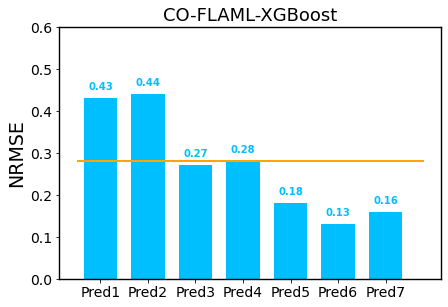

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(5.3,3.5))
ax = fig.add_axes([0,0,1,1])
x= ['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7']
students1=rmse
students2= [48,32,22,18,16]
plt.hlines([rmse_r], -0.5, 6.8, color='orange', linewidth=2)
x = np.arange(7)
wid= 0.7
graph1=ax.bar(x,students1,wid, color='#00BFFF', alpha=1)
#graph2=ax.bar(x+0.2,students2,wid, color='#00BFFF', alpha=1)
#plt.legend(['15min','60min'],title='Data resolution')
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.02,
             str(students1[i]),
             ha='center',
             weight='bold',fontsize=10, color='#00BFFF', alpha=1)
    i+=1

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.7, step=0.1))

#plt.xlabel('Tolerance,Tc (%)', fontsize=19)
plt.ylabel('NRMSE', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title("CO-FLAML-XGBoost",fontsize=18)
plt.savefig("Pred_CO_FLAML_XGBoost.pdf", format="pdf", bbox_inches="tight")
plt.show()

X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

In [16]:
print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

NameError: name 'R' is not defined

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgboost"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-XGBoost',fontsize=16)
plt.savefig("co_xgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgb_limitdepth"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-Extra Tree',fontsize=16)
plt.savefig("co_extra_tree.pdf", format="pdf", bbox_inches="tight")

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)